In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install graphviz
!apt-get install graphviz -y # To install graphviz system-wide

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
import graphviz

In [ ]:
data = pd.read_csv(r'/content/Breast Cancer Dataset.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
df = data.drop(['id'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0}) # Malignant:1, Benign:0

In [ ]:
X = df.drop('diagnosis', axis=1)  # Drop the 'diagnosis' column (target)
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy') #criteria = gini, entropy
model.fit(X_train, y_train)
model

DecisionTreeClassifier(criterion='entropy')

In [1]:
import math
def entropy(column):
  counts = column.value_counts()
  probabilities = counts / len(column)
  return -sum(probabilities * probabilities.apply(math.log2))

def conditional_entropy(data, X, target):
  feature_values = data[X].unique()  # Corrected: use .unique() on the series
  weighted_entropy = 0
  for value in feature_values:
    subset = data[data[feature] == value]
    weighted_entropy += (len(subset) / len(data)) * entropy(subset[target])
    return weighted_entropy

def information_gain(data, X, target):
  total_entropy = entropy(data[target])
  feature_conditional_entropy = conditional_entropy(data, X, target)
  return total_entropy - feature_conditional_entropy
  for feature in X:
    ig = information_gain(df,feature,'diagnosis')
    print(f"Information Gain for {feature}: {ig}")

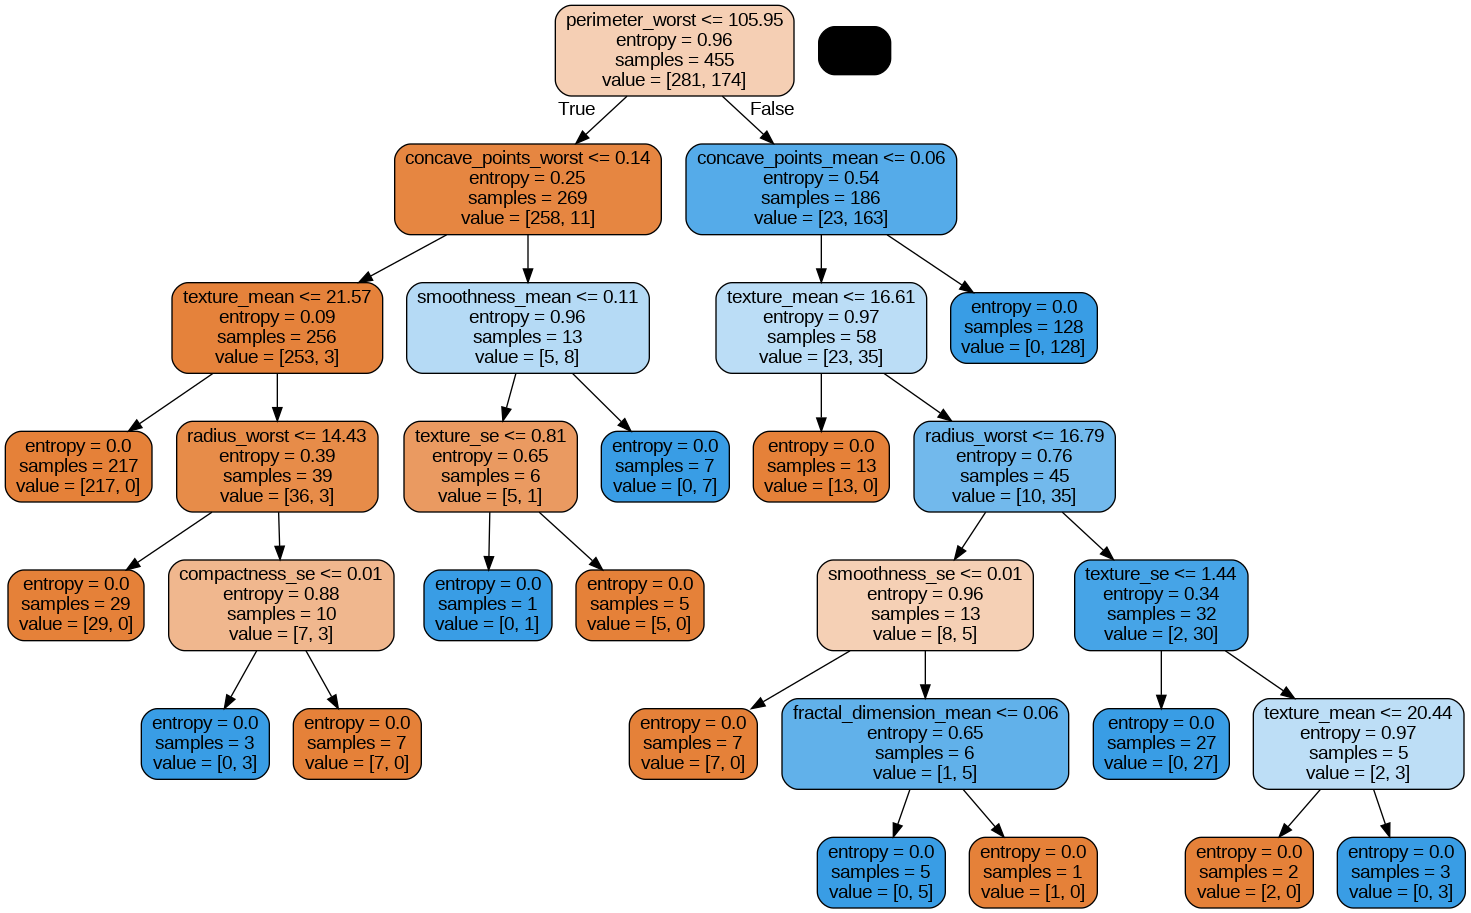

In [ ]:
dot_data = export_graphviz(model, out_file=None,feature_names=X_train.columns,rounded=True, proportion=False,precision=2, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

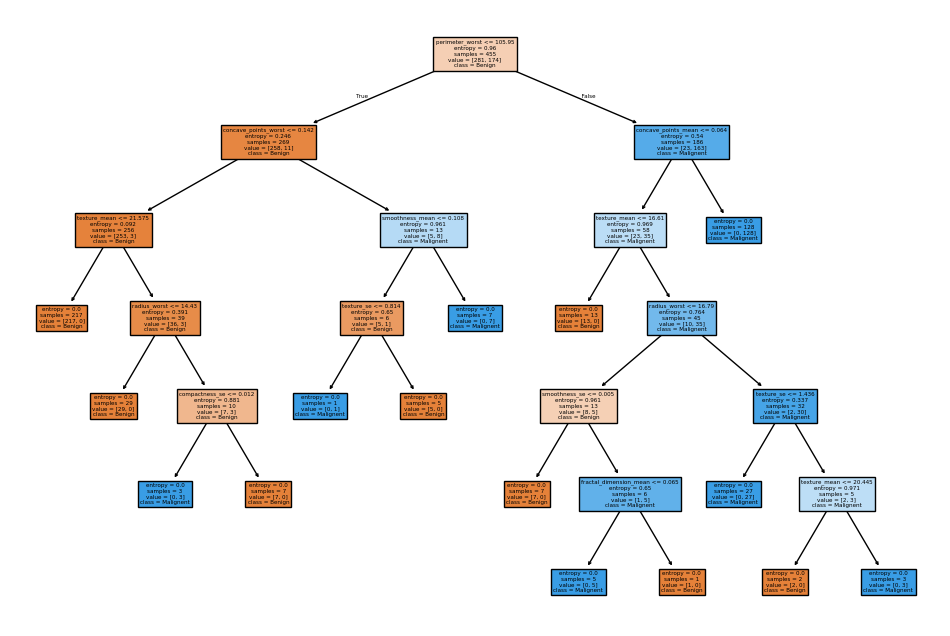

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Benign', 'Malignent'])
plt.show()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
classification_rep = classification_report(y_test, y_pred)
 # Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 90.35087719298247
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        76
           1       0.86      0.84      0.85        38

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



In [ ]:
df.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [ ]:
new = [[12.5, 19.2, 80.0, 500.0, 0.085, 0.1, 0.05, 0.02, 0.17, 0.06,0.4, 1.0, 2.5, 40.0, 0.006, 0.02, 0.03, 0.01, 0.02, 0.003,16.0, 25.0, 105.0, 900.0, 0.13, 0.25, 0.28, 0.12, 0.29, 0.08]]
y_pred = model.predict(new)
if y_pred[0] == 0:
  print("Prediction: Benign")
else:
  print("Prediction: Malignant")

Prediction: Benign
